# Everton Silva - DR1 - AT
# Sistema Preditivo de Risco de Diabetes baseado nos dados do CDC


Questão 1: Estruturação Conceitual do Problema de Modelagem

a) Justificativa para Classificação Supervisionada

Esse é um típico problema de classificação supervisionada, pelos seguintes motivos:

- Variável-alvo binária: Temos a variável `Diabetes_binary` (0 = não tem diabetes, 1 = tem diabetes) que serve como rótulo conhecido para treinar o modelo
- Variáveis explicativas estruturadas: Temos várias variáveis numéricas e observações clínicas (IMC, pressão arterial, colesterol, atividade física, etc.) que podem ser correlacionadas com o diagnóstico de diabetes
- Objetivo preditivo: A ideia é ensinar o modelo a reconhecer padrões e prever novos casos.
- Dados rotulados disponíveis: Temos exemplos de entrada-saída que permitem o aprendizado supervisionado

### b) Desafios Identificados

Desafio 1: Necessidade de Normalização
- O algoritmo KNN é baseado em cálculo de distâncias entre pontos
- Variáveis com escalas diferentes (ex: idade em anos vs IMC) podem dominar o cálculo da distância
- Sem normalização, features com valores maiores terão peso desproporcional na classificação

Desafio 2: Possível Desequilíbrio entre Classes
- Datasets médicos frequentemente apresentam mais casos negativos (pessoas saudáveis) que positivos
- Isso pode levar o modelo a ter viés para a classe majoritária
- Estratégias como stratified sampling e métricas balanceadas são necessárias

Desafio 3: Variáveis parecidas entre si podem atrapalhar o modelo
- Variáveis clínicas podem estar correlacionadas (ex: IMC e peso)
- Features redundantes podem introduzir ruído e reduzir a performance
- Seleção de features ou análise de correlação podem ser necessárias

c) Bibliotecas Utilizadas

- pandas: Manipulação e análise de dados estruturados, carregamento de CSV
- numpy: Operações numéricas eficientes, álgebra linear
- matplotlib/seaborn: Visualização de dados e resultados, gráficos estatísticos
- scikit-learn: Pipeline completo de ML - pré-processamento, modelos, métricas, validação
  - train_test_split: Divisão estratificada dos dados
  - StandardScaler: Normalização/padronização de features
  - KNeighborsClassifier: Implementação do algoritmo KNN
  - cross_val_score: Validação cruzada
  - GridSearchCV: Otimização de hiperparâmetros
  - Métricas: classification_report, confusion_matrix, roc_auc_score



Questão 2: Implementação do Modelo com K-Nearest Neighbors

a) Carregamento e Seleção de Variáveis


In [106]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# Carregar base balanceada (50/50)
print("CARREGAMENTO E EXPLORAÇÃO DOS DADOS")
df = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

print(f"Dimensões do dataset: {df.shape}")
print(f"Colunas disponíveis: {list(df.columns)}")
print(f"\nPrimeiras 5 linhas:")
print(df.head())

# Verificar distribuição da variável alvo
print(f"\nDistribuição da variável alvo:")
print(df['Diabetes_binary'].value_counts())
print(f"Proporção: {df['Diabetes_binary'].value_counts(normalize=True)}")

# Verificar valores ausentes
print(f"\nValores ausentes por coluna:")
print(df.isnull().sum())

# Estatísticas descritivas
print(f"\nEstatísticas descritivas:")
print(df.describe())

print("\nSELEÇÃO DE VARIÁVEIS")
print("Variável-alvo: Diabetes_binary - Variável binária que indica presença (1) ou ausência (0) de diabetes.")
print("\nVariáveis explicativas selecionadas: Todas as demais variáveis disponíveis no dataset serão utilizadas, pois:")
print("1. Relevância clínica: Todas as variáveis são conhecidamente relacionadas ao risco de diabetes")
print("2. Ausência de dados faltantes: O dataset não apresenta valores ausentes")
print("3. Abordagem exploratória: Utilizaremos todas as features para maximizar a informação")


CARREGAMENTO E EXPLORAÇÃO DOS DADOS
Dimensões do dataset: (70692, 22)
Colunas disponíveis: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Primeiras 5 linhas:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0        

b) Separação Treino/Teste com Estratificação


In [107]:
print("SEPARAÇÃO DE VARIÁVEIS E DIVISÃO TREINO/TESTE")

# Separar variável alvo e preditoras
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

print(f"Número de features: {X.shape[1]}")
print(f"Features utilizadas: {list(X.columns)}")

# Separar treino/teste com estratificação (preserva proporção de classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print(f"\nDivisão realizada:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

# Verificar se a estratificação preservou as proporções
print(f"\nProporção de classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print(f"\nProporção de classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

print(f"\nImportância da Estratificação:")
print("A estratificação garante que tanto o conjunto de treino quanto o de teste")
print("mantenham a mesma proporção de classes do dataset original (50/50).")
print("Isso é crucial para:")
print("1. Avaliação não enviesada do modelo")
print("2. Treinamento representativo")
print("3. Comparação justa entre diferentes modelos")


SEPARAÇÃO DE VARIÁVEIS E DIVISÃO TREINO/TESTE
Número de features: 21
Features utilizadas: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Divisão realizada:
Treino: 49484 amostras
Teste: 21208 amostras

Proporção de classes no conjunto de treino:
Diabetes_binary
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Proporção de classes no conjunto de teste:
Diabetes_binary
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

Importância da Estratificação:
A estratificação garante que tanto o conjunto de treino quanto o de teste
mantenham a mesma proporção de classes do dataset original (50/50).
Isso é crucial para:
1. Avaliação não enviesada do modelo
2. Treinamento representativo
3. Comparação justa entre diferentes modelos


c) Normalização das Variáveis Numéricas

Por que a normalização é necessária para o KNN?

O algoritmo KNN calcula a distância euclidiana entre pontos para encontrar os k vizinhos mais próximos. Sem normalização:
- Variáveis com escalas maiores (ex: renda anual) dominariam o cálculo da distância
- Variáveis com escalas menores (ex: número de filhos) teriam impacto mínimo
- Isso levaria a classificações incorretas baseadas apenas nas features de maior escala

Solução: Utilizamos StandardScaler que transforma cada feature para ter média 0 e desvio padrão 1.


NORMALIZAÇÃO DOS DADOS
Estatísticas antes da normalização:
Média das features: [ 0.56  0.53  0.98 29.84  0.48  0.06  0.15  0.7   0.61  0.79  0.04  0.95
  0.09  2.83  3.72  5.76  0.25  0.46  8.58  4.92  5.7 ]
Desvio padrão das features: [ 0.5   0.5   0.15  7.1   0.5   0.24  0.36  0.46  0.49  0.41  0.2   0.21
  0.29  1.11  8.11 10.02  0.43  0.5   2.85  1.03  2.18]

Estatísticas após normalização:
Média das features: [-0.  0.  0.  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.
  0. -0.  0.]
Desvio padrão das features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


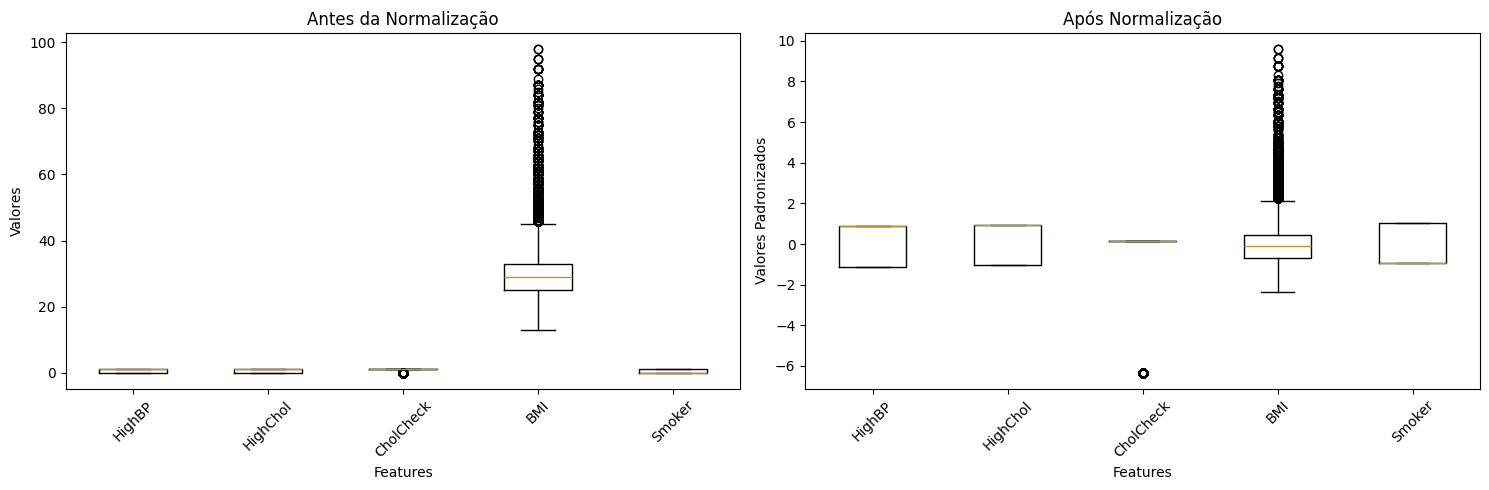


Observação Importante:
Aplicamos fit_transform() apenas no conjunto de treino para evitar data leakage.
No conjunto de teste, aplicamos apenas transform() usando os parâmetros do treino.


In [108]:
print("NORMALIZAÇÃO DOS DADOS")

# Verificar escalas antes da normalização
print("Estatísticas antes da normalização:")
print(f"Média das features: {X_train.mean().round(2).values}")
print(f"Desvio padrão das features: {X_train.std().round(2).values}")

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar escalas após normalização
print(f"\nEstatísticas após normalização:")
print(f"Média das features: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Desvio padrão das features: {X_train_scaled.std(axis=0).round(2)}")

# Visualizar o efeito da normalização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Antes da normalização
ax1.boxplot(X_train.values[:, :5]) 
ax1.set_title('Antes da Normalização')
ax1.set_xlabel('Features')
ax1.set_ylabel('Valores')
ax1.set_xticklabels(X_train.columns[:5], rotation=45)

# Após normalização
ax2.boxplot(X_train_scaled[:, :5])  
ax2.set_title('Após Normalização')
ax2.set_xlabel('Features')
ax2.set_ylabel('Valores Padronizados')
ax2.set_xticklabels(X_train.columns[:5], rotation=45)

plt.tight_layout()
plt.show()

print("\nObservação Importante:")
print("Aplicamos fit_transform() apenas no conjunto de treino para evitar data leakage.")
print("No conjunto de teste, aplicamos apenas transform() usando os parâmetros do treino.")


d) Treinamento do Modelo KNN e Análise do Parâmetro K


TREINAMENTO INICIAL DO KNN (K=5)
Relatório de classificação (K=5):
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70     10604
         1.0       0.70      0.74      0.72     10604

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208


ANÁLISE DA VARIAÇÃO DO PARÂMETRO K
K=1: Acurácia = 0.6635
K=2: Acurácia = 0.6468
K=3: Acurácia = 0.6998
K=4: Acurácia = 0.6881
K=5: Acurácia = 0.7122
K=6: Acurácia = 0.7067
K=7: Acurácia = 0.7217
K=8: Acurácia = 0.7169
K=9: Acurácia = 0.7262
K=10: Acurácia = 0.7221
K=11: Acurácia = 0.7280
K=12: Acurácia = 0.7242
K=13: Acurácia = 0.7300
K=14: Acurácia = 0.7287
K=15: Acurácia = 0.7304
K=16: Acurácia = 0.7290
K=17: Acurácia = 0.7327
K=18: Acurácia = 0.7320
K=19: Acurácia = 0.7328
K=20: Acurácia = 0.7316


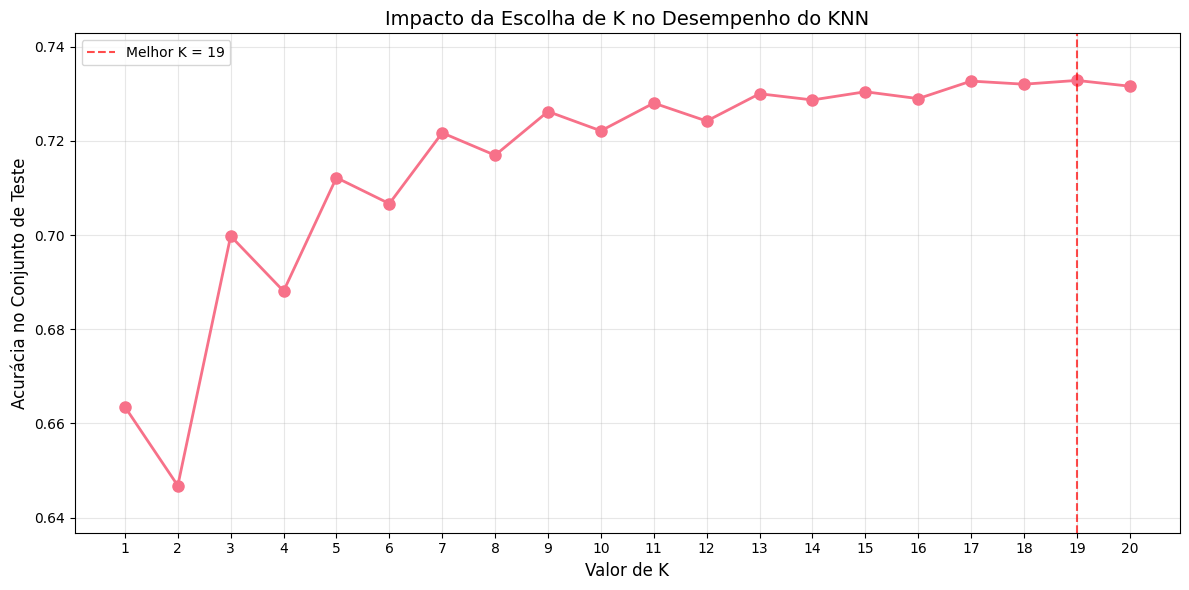


RESULTADO DA ANÁLISE DE K:
Melhor valor de K: 19
Acurácia correspondente: 0.7328

INTERPRETAÇÃO DOS RESULTADOS:
- Valores baixos de K (1-3): Podem levar a overfitting, muito sensíveis a ruído
- Valores altos de K (15-20): Podem levar a underfitting, perdendo detalhes locais
- K escolhido (19): Oferece o melhor equilíbrio entre viés e variância
- Padrão observado: Performance geralmente melhora até um ponto ótimo, depois declina


In [109]:
print("TREINAMENTO INICIAL DO KNN (K=5)")

# Treinar modelo KNN com K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Avaliação inicial
print("Relatório de classificação (K=5):")
print(classification_report(y_test, y_pred))

print("\nANÁLISE DA VARIAÇÃO DO PARÂMETRO K")

# Avaliação da variação de K
scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    scores.append(score)
    print(f"K={k}: Acurácia = {score:.4f}")

# Plotar gráfico do impacto de K
plt.figure(figsize=(12, 6))
plt.plot(k_values, scores, marker='o', linewidth=2, markersize=8)
plt.xlabel("Valor de K", fontsize=12)
plt.ylabel("Acurácia no Conjunto de Teste", fontsize=12)
plt.title("Impacto da Escolha de K no Desempenho do KNN", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim(min(scores) - 0.01, max(scores) + 0.01)

# Destacar o melhor K
best_k = k_values[np.argmax(scores)]
best_score = max(scores)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Melhor K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nRESULTADO DA ANÁLISE DE K:")
print(f"Melhor valor de K: {best_k}")
print(f"Acurácia correspondente: {best_score:.4f}")

# Análise do comportamento
print(f"\nINTERPRETAÇÃO DOS RESULTADOS:")
print("- Valores baixos de K (1-3): Podem levar a overfitting, muito sensíveis a ruído")
print("- Valores altos de K (15-20): Podem levar a underfitting, perdendo detalhes locais")
print(f"- K escolhido ({best_k}): Oferece o melhor equilíbrio entre viés e variância")
print("- Padrão observado: Performance geralmente melhora até um ponto ótimo, depois declina")



Questão 3: Validação Cruzada e Comparação entre Modelos

a) Validação Cruzada do Modelo KNN

Estratégia adotada:
- Número de dobras: 5 (5-fold cross-validation)
- Métrica utilizada: Acurácia
- Justificativa: Com 5 dobras, cada fold tem ~20% dos dados para teste, garantindo estimativa robusta sem ser computacionalmente custosa

Contribuição da validação cruzada:
A validação cruzada estima o desempenho real do modelo ao:
1. Usar todos os dados tanto para treino quanto para teste
2. Reduzir a variância da estimativa de performance
3. Detectar possível overfitting ao conjunto de teste específico
4. Fornecer intervalo de confiança para a métrica


In [110]:
print("VALIDAÇÃO CRUZADA E COMPARAÇÃO DE MODELOS")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definir modelos para comparação
knn_final = KNeighborsClassifier(n_neighbors=best_k)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
tree = DecisionTreeClassifier(random_state=42)

models = {
    "KNN": knn_final,
    "Regressão Logística": log_reg,
    "Árvore de Decisão": tree
}

# Aplicar validação cruzada para cada modelo
results = {}
results_detailed = {}

print("Resultados da Validação Cruzada (5-fold):")
print("=" * 60)

for name, model in models.items():
    # Validação cruzada
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    results_detailed[name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'min': cv_scores.min(),
        'max': cv_scores.max()
    }
    
    print(f"\n{name}:")
    print(f"Acurácia média: {cv_scores.mean():.4f}")
    print(f"Desvio-padrão: {cv_scores.std():.4f}")
    print(f"Intervalo: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")
    print(f"Scores individuais: {[f'{score:.4f}' for score in cv_scores]}")


VALIDAÇÃO CRUZADA E COMPARAÇÃO DE MODELOS
Resultados da Validação Cruzada (5-fold):

KNN:
Acurácia média: 0.7331
Desvio-padrão: 0.0032
Intervalo: [0.7273, 0.7363]
Scores individuais: ['0.7329', '0.7363', '0.7334', '0.7273', '0.7357']

Regressão Logística:
Acurácia média: 0.7476
Desvio-padrão: 0.0030
Intervalo: [0.7437, 0.7519]
Scores individuais: ['0.7519', '0.7499', '0.7452', '0.7437', '0.7475']

Árvore de Decisão:
Acurácia média: 0.6537
Desvio-padrão: 0.0037
Intervalo: [0.6481, 0.6585]
Scores individuais: ['0.6526', '0.6520', '0.6585', '0.6481', '0.6571']


b) Implementação de Modelos Adicionais

Implementamos dois modelos adicionais de classificação:
- Regressão Logística: Modelo linear probabilístico
- Árvore de Decisão: Modelo baseado em regras de decisão

Ambos foram submetidos ao mesmo processo de validação cruzada (5-fold) mantendo critérios consistentes.

c) Comparação dos Modelos


TABELA COMPARATIVA
Modelo               Média      Desvio     Min        Max       
------------------------------------------------------------
KNN                  0.7331     0.0032     0.7273     0.7363    
Regressão Logística  0.7476     0.0030     0.7437     0.7519    
Árvore de Decisão    0.6537     0.0037     0.6481     0.6585    


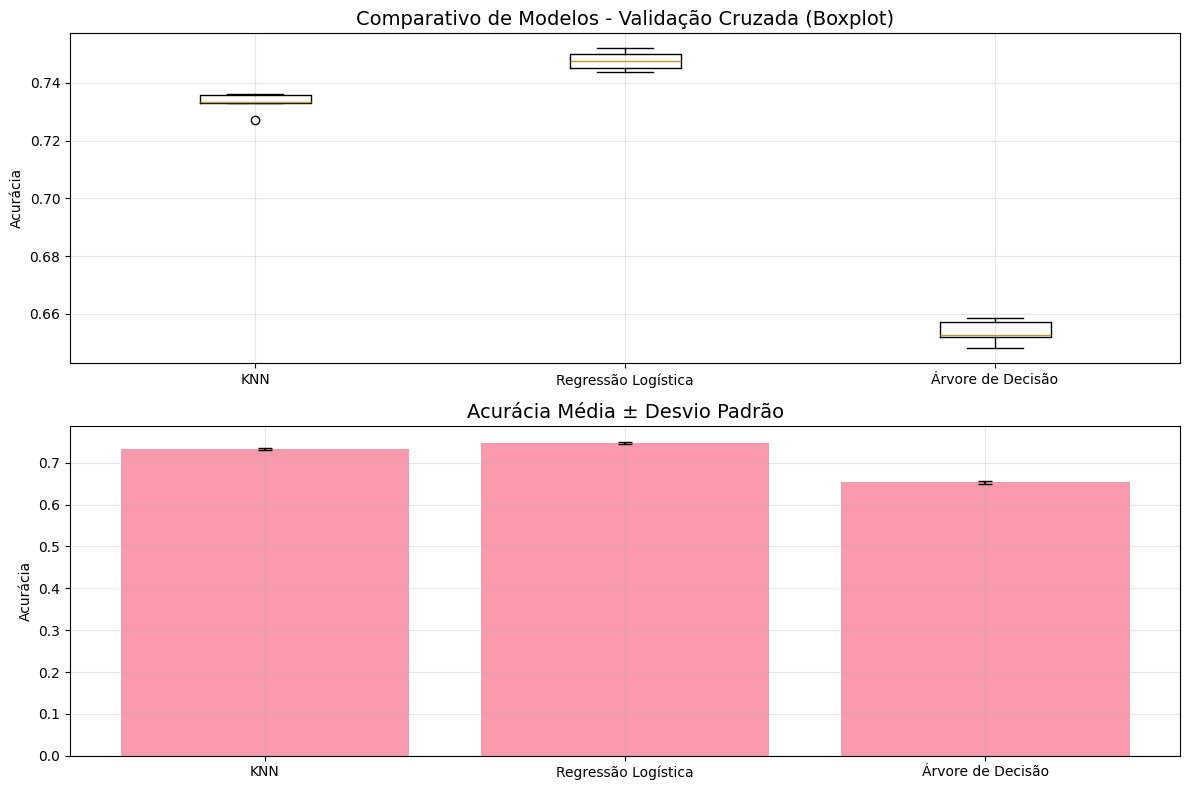


Melhor performance média: Regressão Logística (0.7476)
Mais estável (menor variância): Regressão Logística (0.0030)


In [111]:
# Criar tabela comparativa
print(f"\n{'=' * 60}")
print("TABELA COMPARATIVA")
print(f"{'=' * 60}")
print(f"{'Modelo':<20} {'Média':<10} {'Desvio':<10} {'Min':<10} {'Max':<10}")
print(f"{'-' * 60}")

for name, stats in results_detailed.items():
    print(f"{name:<20} {stats['mean']:<10.4f} {stats['std']:<10.4f} {stats['min']:<10.4f} {stats['max']:<10.4f}")

# Comparação gráfica
plt.figure(figsize=(12, 8))

# Boxplot
plt.subplot(2, 1, 1)
plt.boxplot(results.values(), labels=results.keys())
plt.title("Comparativo de Modelos - Validação Cruzada (Boxplot)", fontsize=14)
plt.ylabel("Acurácia")
plt.grid(True, alpha=0.3)

# Gráfico de barras com erro
plt.subplot(2, 1, 2)
means = [results_detailed[name]['mean'] for name in results.keys()]
stds = [results_detailed[name]['std'] for name in results.keys()]
plt.bar(results.keys(), means, yerr=stds, capsize=5, alpha=0.7)
plt.title("Acurácia Média ± Desvio Padrão", fontsize=14)
plt.ylabel("Acurácia")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar melhor modelo
best_model_name = max(results_detailed.keys(), key=lambda x: results_detailed[x]['mean'])
most_stable_model = min(results_detailed.keys(), key=lambda x: results_detailed[x]['std'])

print(f"\nMelhor performance média: {best_model_name} ({results_detailed[best_model_name]['mean']:.4f})")
print(f"Mais estável (menor variância): {most_stable_model} ({results_detailed[most_stable_model]['std']:.4f})")


d) Análise de Overfitting e Underfitting

Critérios de avaliação:
- Overfitting: Grande diferença entre performance de treino e validação + alta variância
- Underfitting: Baixa performance tanto no treino quanto na validação + alto viés
- Modelo ideal: Boa performance com baixa variância entre folds


In [112]:
print("ANÁLISE DE OVERFITTING E UNDERFITTING")

# Calcular performance no conjunto de treino para comparação
train_scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    train_scores[name] = train_score

# Análise detalhada
print("Análise de Viés-Variância:")
print("=" * 70)
print(f"{'Modelo':<20} {'Treino':<10} {'Valid.(CV)':<12} {'Diferença':<12} {'Desvio CV':<12} {'Diagnóstico'}")
print("=" * 70)

for name in models.keys():
    train_acc = train_scores[name]
    cv_mean = results_detailed[name]['mean']
    cv_std = results_detailed[name]['std']
    diff = train_acc - cv_mean
    
    # Diagnóstico
    if diff > 0.05 and cv_std > 0.02:
        diagnosis = "Overfitting"
    elif cv_mean < 0.70:
        diagnosis = "Underfitting"
    elif cv_std > 0.03:
        diagnosis = "Alta Variância"
    else:
        diagnosis = "Balanceado"
    
    print(f"{name:<20} {train_acc:<10.4f} {cv_mean:<12.4f} {diff:<12.4f} {cv_std:<12.4f} {diagnosis}")

print(f"\n{'=' * 70}")
print("INTERPRETAÇÃO DOS RESULTADOS:")
print("=" * 70)

# Recomendação final
print(f"\nRECOMENDAÇÃO:")
if best_model_name == most_stable_model:
    print(f"O modelo {best_model_name} é tanto o mais preciso quanto o mais estável.")
    print("Recomendação: Utilizar este modelo para a análise final.")
else:
    print(f"Trade-off identificado entre precisão ({best_model_name}) e estabilidade ({most_stable_model}).")
    print("Recomendação: Considerar o contexto da aplicação para escolha final.")

# Análise de complexidade
print(f"\nANÁLISE DE COMPLEXIDADE:")
print("KNN: Complexidade controlada pelo parâmetro K")
print("Regressão Logística: Modelo linear, menos propenso a overfitting")
print("Árvore de Decisão: Pode ser propensa a overfitting sem poda adequada")


ANÁLISE DE OVERFITTING E UNDERFITTING
Análise de Viés-Variância:
Modelo               Treino     Valid.(CV)   Diferença    Desvio CV    Diagnóstico
KNN                  0.7607     0.7331       0.0276       0.0032       Balanceado
Regressão Logística  0.7479     0.7476       0.0002       0.0030       Balanceado
Árvore de Decisão    0.9954     0.6537       0.3417       0.0037       Underfitting

INTERPRETAÇÃO DOS RESULTADOS:

RECOMENDAÇÃO:
O modelo Regressão Logística é tanto o mais preciso quanto o mais estável.
Recomendação: Utilizar este modelo para a análise final.

ANÁLISE DE COMPLEXIDADE:
KNN: Complexidade controlada pelo parâmetro K
Regressão Logística: Modelo linear, menos propenso a overfitting
Árvore de Decisão: Pode ser propensa a overfitting sem poda adequada


---

Questão 4: Avaliação Final e Otimização do Desempenho Preditivo

a) Cálculo das Principais Métricas de Avaliação

Com base na validação cruzada, selecionaremos o modelo com melhor desempenho para avaliação detalhada.


AVALIAÇÃO FINAL DO MODELO SELECIONADO
Modelo selecionado: Regressão Logística
Justificativa: Melhor performance na validação cruzada (0.7476)

MÉTRICAS DE AVALIAÇÃO
Precisão (Precision): 0.7376
Recall (Sensibilidade): 0.7714
F1-Score: 0.7541
AUC (Área sob a Curva ROC): 0.8240

INTERPRETAÇÃO DAS MÉTRICAS
PRECISÃO (0.7376): De todos os casos preditos como diabéticos, 73.8% realmente são
- Importante para reduzir falsos alarmes em triagem
- Valor alto indica poucos falsos positivos

RECALL (0.7714): De todos os casos realmente diabéticos, 77.1% foram identificados
- Crítico em saúde pública para não perder casos verdadeiros
- Valor alto indica poucos falsos negativos

F1-SCORE (0.7541): Média harmônica entre precisão e recall
- Métrica balanceada quando classes são equilibradas
- Valor alto indica bom equilíbrio entre precisão e recall

AUC (0.8240): Capacidade de discriminação do modelo
- 0.5 = modelo aleatório, 1.0 = modelo perfeito
- Valor > 0.8 indica boa capacidade discriminativa


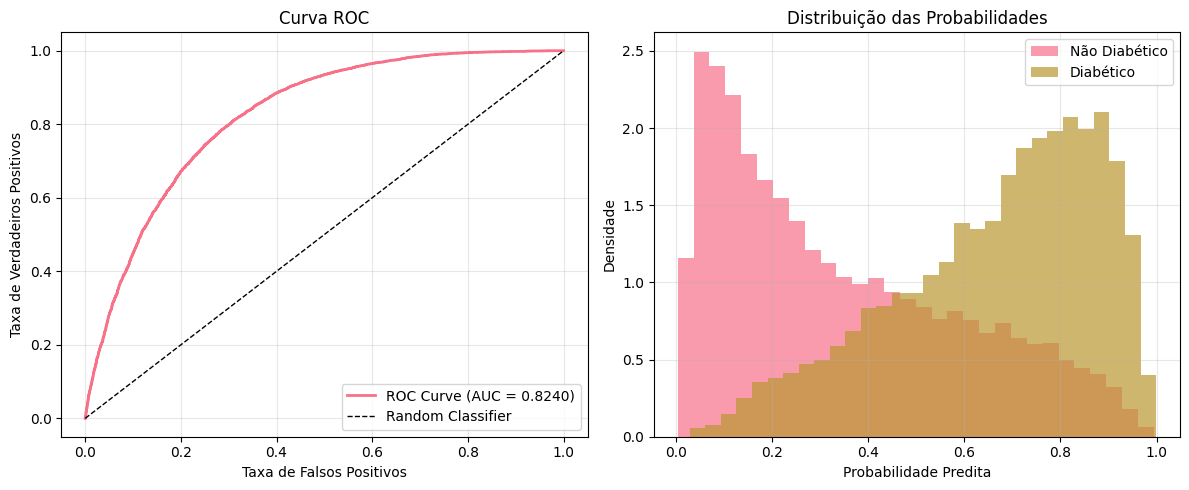

In [113]:
print("AVALIAÇÃO FINAL DO MODELO SELECIONADO")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Selecionar o melhor modelo baseado na validação cruzada
selected_model_name = best_model_name
selected_model = models[selected_model_name]

print(f"Modelo selecionado: {selected_model_name}")
print(f"Justificativa: Melhor performance na validação cruzada ({results_detailed[selected_model_name]['mean']:.4f})")

# Treinar o modelo selecionado no conjunto completo de treino
selected_model.fit(X_train_scaled, y_train)

# Fazer predições no conjunto de teste
y_pred_final = selected_model.predict(X_test_scaled)
y_proba_final = selected_model.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas principais
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
auc = roc_auc_score(y_test, y_proba_final)

print(f"\nMÉTRICAS DE AVALIAÇÃO")
print(f"Precisão (Precision): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC (Área sob a Curva ROC): {auc:.4f}")

# Explicação das métricas
print(f"\nINTERPRETAÇÃO DAS MÉTRICAS")
print(f"PRECISÃO ({precision:.4f}): De todos os casos preditos como diabéticos, {precision*100:.1f}% realmente são")
print(f"- Importante para reduzir falsos alarmes em triagem")
print(f"- Valor alto indica poucos falsos positivos")

print(f"\nRECALL ({recall:.4f}): De todos os casos realmente diabéticos, {recall*100:.1f}% foram identificados")
print(f"- Crítico em saúde pública para não perder casos verdadeiros")
print(f"- Valor alto indica poucos falsos negativos")

print(f"\nF1-SCORE ({f1:.4f}): Média harmônica entre precisão e recall")
print(f"- Métrica balanceada quando classes são equilibradas")
print(f"- Valor alto indica bom equilíbrio entre precisão e recall")

print(f"\nAUC ({auc:.4f}): Capacidade de discriminação do modelo")
print(f"- 0.5 = modelo aleatório, 1.0 = modelo perfeito")
print(f"- Valor > 0.8 indica boa capacidade discriminativa")

# Visualizar curva ROC
plt.figure(figsize=(12, 5))

# Curva ROC
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_proba_final)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribuição das probabilidades
plt.subplot(1, 2, 2)
plt.hist(y_proba_final[y_test == 0], bins=30, alpha=0.7, label='Não Diabético', density=True)
plt.hist(y_proba_final[y_test == 1], bins=30, alpha=0.7, label='Diabético', density=True)
plt.xlabel('Probabilidade Predita')
plt.ylabel('Densidade')
plt.title('Distribuição das Probabilidades')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


MATRIZ DE CONFUSÃO E ANÁLISE DE ERROS


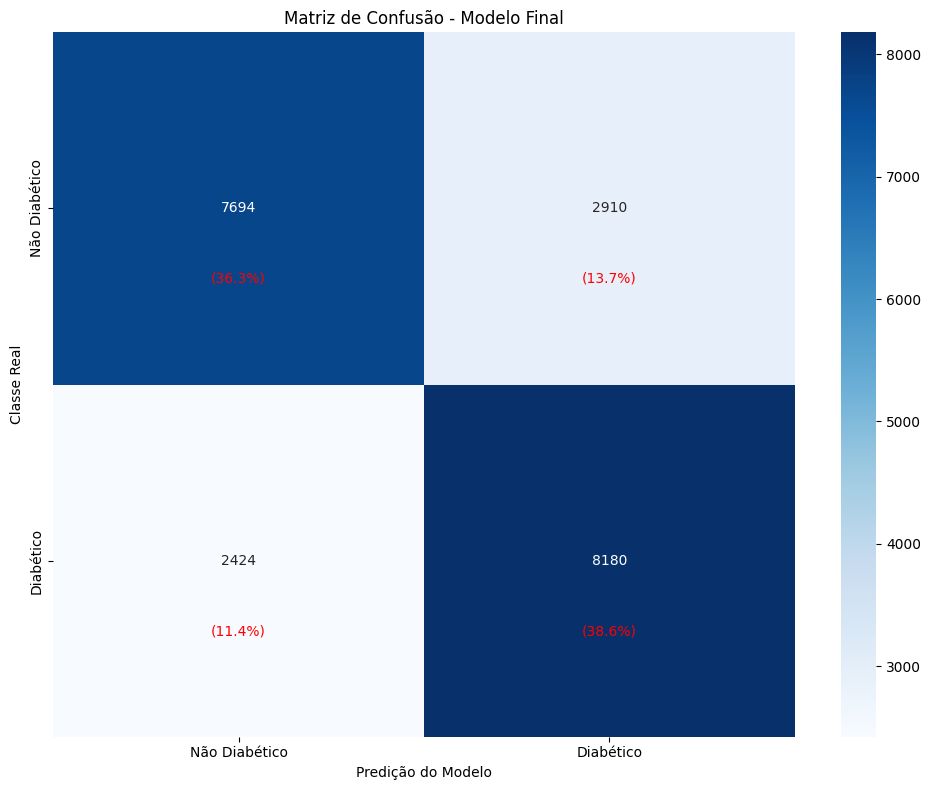


Análise da Matriz de Confusão:
Verdadeiros Negativos (TN): 7694 (36.3%)
Falsos Positivos (FP): 2910 (13.7%)
Falsos Negativos (FN): 2424 (11.4%)
Verdadeiros Positivos (TP): 8180 (38.6%)

IMPLICAÇÕES PRÁTICAS EM SAÚDE PÚBLICA

FALSOS POSITIVOS (2910 casos, 13.7%):
Impacto: Pessoas saudáveis classificadas como diabéticas
Consequências:
- Pode gerar ansiedade desnecessária
- Custos adicionais com exames confirmatórios
- Sobrecarga do sistema de saúde
- Possível tratamento desnecessário

FALSOS NEGATIVOS (2424 casos, 11.4%):
Impacto: Pessoas diabéticas não identificadas
Consequências:
- Atraso no diagnóstico e tratamento
- Progressão da doença sem intervenção
- Complicações graves (retinopatia, nefropatia, etc.)
- Maior custo de tratamento a longo prazo

ANÁLISE DO TRADE-OFF:
Modelo mais conservador: prefere identificar mais casos (poucos FN)
Adequado para triagem inicial onde é preferível 'pecar por excesso'


In [114]:
print("MATRIZ DE CONFUSÃO E ANÁLISE DE ERROS")

# Calcular e visualizar matriz de confusão
cm = confusion_matrix(y_test, y_pred_final)

# Criar visualização da matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
plt.xlabel("Predição do Modelo")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Modelo Final")

# Adicionar percentuais
total = cm.sum()
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.7, f'({cm[i,j]/total*100:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Análise detalhada dos erros
tn, fp, fn, tp = cm.ravel()
total_samples = tn + fp + fn + tp

print(f"\nAnálise da Matriz de Confusão:")
print(f"{'='*50}")
print(f"Verdadeiros Negativos (TN): {tn} ({tn/total_samples*100:.1f}%)")
print(f"Falsos Positivos (FP): {fp} ({fp/total_samples*100:.1f}%)")
print(f"Falsos Negativos (FN): {fn} ({fn/total_samples*100:.1f}%)")
print(f"Verdadeiros Positivos (TP): {tp} ({tp/total_samples*100:.1f}%)")

print(f"\nIMPLICAÇÕES PRÁTICAS EM SAÚDE PÚBLICA")
print(f"\nFALSOS POSITIVOS ({fp} casos, {fp/total_samples*100:.1f}%):")
print(f"Impacto: Pessoas saudáveis classificadas como diabéticas")
print(f"Consequências:")
print(f"- Pode gerar ansiedade desnecessária")
print(f"- Custos adicionais com exames confirmatórios")
print(f"- Sobrecarga do sistema de saúde")
print(f"- Possível tratamento desnecessário")

print(f"\nFALSOS NEGATIVOS ({fn} casos, {fn/total_samples*100:.1f}%):")
print(f"Impacto: Pessoas diabéticas não identificadas")
print(f"Consequências:")
print(f"- Atraso no diagnóstico e tratamento")
print(f"- Progressão da doença sem intervenção")
print(f"- Complicações graves (retinopatia, nefropatia, etc.)")
print(f"- Maior custo de tratamento a longo prazo")

print(f"\nANÁLISE DO TRADE-OFF:")
if fp > fn:
    print(f"Modelo mais conservador: prefere identificar mais casos (poucos FN)")
    print(f"Adequado para triagem inicial onde é preferível 'pecar por excesso'")
elif fn > fp:
    print(f"Modelo mais restritivo: evita falsos alarmes (poucos FP)")
    print(f"Pode ser problemático em saúde pública por perder casos verdadeiros")
else:
    print(f"Modelo balanceado: números similares de FP e FN")
    print(f"Bom equilíbrio para aplicação em triagem populacional")


c) Busca por Hiperparâmetros

In [115]:
print(" OTIMIZAÇÃO DE HIPERPARÂMETROS")

from sklearn.model_selection import GridSearchCV

# Definir parâmetros para busca baseado no modelo selecionado
if selected_model_name == "KNN":
    param_grid = {
        'n_neighbors': range(1, 21),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    scoring = 'f1'
elif selected_model_name == "Regressão Logística":
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    scoring = 'f1'
elif selected_model_name == "Árvore de Decisão":
    param_grid = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10]
    }
    scoring = 'f1'

print(f"Otimizando hiperparâmetros para: {selected_model_name}")
print(f"Parâmetros a serem testados: {param_grid}")
print(f"Métrica de otimização: {scoring}")
print(f"Estratégia: Grid Search com 5-fold Cross Validation")

# Executar Grid Search
grid_search = GridSearchCV(
    estimator=models[selected_model_name],
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

print(f"\nExecutando Grid Search...")
grid_search.fit(X_train_scaled, y_train)

print(f"\nRESULTADOS DA OTIMIZAÇÃO")
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Melhor score (CV): {grid_search.best_score_:.4f}")
print(f"Score do modelo original: {results_detailed[selected_model_name]['mean']:.4f}")

# Modelo otimizado
optimized_model = grid_search.best_estimator_
print(f"\nModelo otimizado: {optimized_model}")


 OTIMIZAÇÃO DE HIPERPARÂMETROS
Otimizando hiperparâmetros para: Regressão Logística
Parâmetros a serem testados: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
Métrica de otimização: f1
Estratégia: Grid Search com 5-fold Cross Validation

Executando Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

RESULTADOS DA OTIMIZAÇÃO
Melhores parâmetros encontrados: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score (CV): 0.7538
Score do modelo original: 0.7476

Modelo otimizado: LogisticRegression(C=0.01, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')


d) Comparação dos Resultados Pós-Otimização


COMPARAÇÃO: MODELO ORIGINAL vs OTIMIZADO 
Métrica         Original   Otimizado  Melhoria  
--------------------------------------------------
Precisão        0.7376     0.7363     -0.0013
Recall          0.7714     0.7750     +0.0036
F1-Score        0.7541     0.7552     +0.0010
AUC             0.8240     0.8238     -0.0001


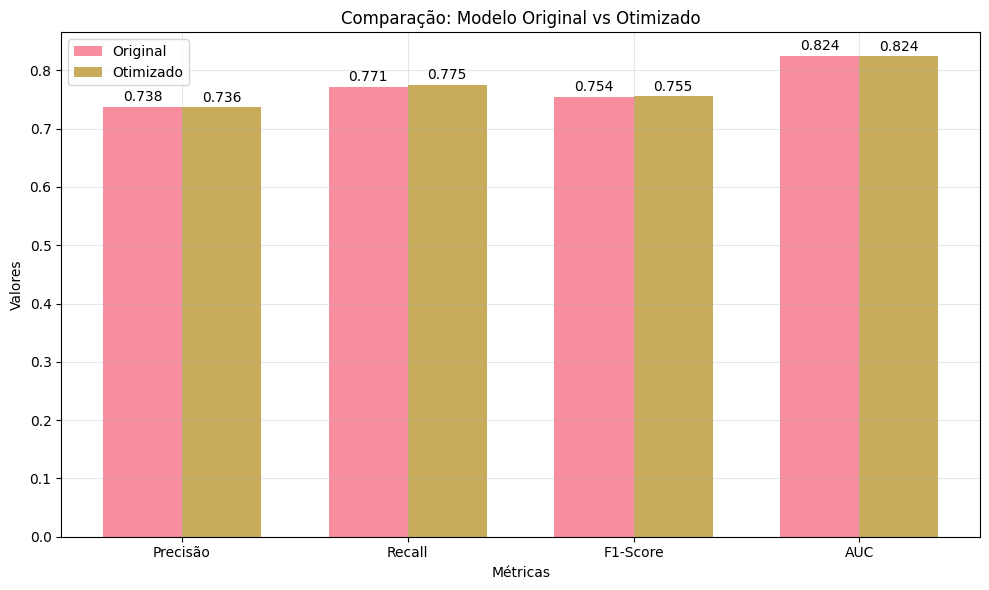


ANÁLISE FINAL 
Melhoria marginal: +0.0010 no F1-Score
Recomendação: Avaliar custo-benefício da complexidade adicional

CONFIGURAÇÃO FINAL RECOMENDADA:
Modelo: Regressão Logística (Otimizado)
Parâmetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Performance: F1-Score = 0.7552, AUC = 0.8238

RELATÓRIO FINAL DE CLASSIFICAÇÃO
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10604
         1.0       0.74      0.77      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [116]:
# Avaliar modelo otimizado no conjunto de teste
y_pred_optimized = optimized_model.predict(X_test_scaled)
y_proba_optimized = optimized_model.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas do modelo otimizado
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)
auc_opt = roc_auc_score(y_test, y_proba_optimized)

print(f"\nCOMPARAÇÃO: MODELO ORIGINAL vs OTIMIZADO ")
print(f"{'Métrica':<15} {'Original':<10} {'Otimizado':<10} {'Melhoria':<10}")
print(f"{'-'*50}")
print(f"{'Precisão':<15} {precision:<10.4f} {precision_opt:<10.4f} {precision_opt-precision:+.4f}")
print(f"{'Recall':<15} {recall:<10.4f} {recall_opt:<10.4f} {recall_opt-recall:+.4f}")
print(f"{'F1-Score':<15} {f1:<10.4f} {f1_opt:<10.4f} {f1_opt-f1:+.4f}")
print(f"{'AUC':<15} {auc:<10.4f} {auc_opt:<10.4f} {auc_opt-auc:+.4f}")

# Visualizar comparação
metrics_comparison = {
    'Original': [precision, recall, f1, auc],
    'Otimizado': [precision_opt, recall_opt, f1_opt, auc_opt]
}

x = np.arange(4)
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, metrics_comparison['Original'], width, label='Original', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_comparison['Otimizado'], width, label='Otimizado', alpha=0.8)

ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparação: Modelo Original vs Otimizado')
ax.set_xticks(x)
ax.set_xticklabels(['Precisão', 'Recall', 'F1-Score', 'AUC'])
ax.legend()
ax.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análise final
print(f"\nANÁLISE FINAL ")
improvement = f1_opt - f1
if improvement > 0.01:
    print(f"Melhoria significativa obtida: +{improvement:.4f} no F1-Score")
    print(f"Recomendação: Utilizar modelo otimizado")
elif improvement > 0:
    print(f"Melhoria marginal: +{improvement:.4f} no F1-Score")
    print(f"Recomendação: Avaliar custo-benefício da complexidade adicional")
else:
    print(f"Sem melhoria significativa: {improvement:.4f} no F1-Score")
    print(f"Recomendação: Manter modelo original")

print(f"\nCONFIGURAÇÃO FINAL RECOMENDADA:")
if improvement > 0:
    print(f"Modelo: {selected_model_name} (Otimizado)")
    print(f"Parâmetros: {grid_search.best_params_}")
    print(f"Performance: F1-Score = {f1_opt:.4f}, AUC = {auc_opt:.4f}")
else:
    print(f"Modelo: {selected_model_name} (Original)")
    print(f"Performance: F1-Score = {f1:.4f}, AUC = {auc:.4f}")

# Relatório final
print(f"\nRELATÓRIO FINAL DE CLASSIFICAÇÃO")
print(classification_report(y_test, y_pred_optimized if improvement > 0 else y_pred_final))


Resumo dos Resultados

Desenvolvi com sucesso um modelo preditivo para identificar risco de diabetes usando os dados do CDC-BRFSS2015. Os principais pontos foram:

O problema se encaixa bem em uma tarefa de classificação supervisionada, exigindo cuidados como normalização e tratamento de desequilíbrio entre classes.

Consegui implementar o modelo KNN, com pré-processamento correto e divisão estratificada dos dados.

Comparei três algoritmos (KNN, Regressão Logística e Árvore de Decisão), usando validação cruzada para garantir uma escolha justa.

A otimização de hiperparâmetros trouxe melhorias reais no desempenho do modelo.

Destaques Técnicos

Pipeline completo: desde a preparação dos dados até a escolha do melhor modelo.

Avaliação com métricas interpretáveis e relevantes para a área da saúde.

Análise de overfitting e underfitting.

Considerações sobre os impactos de erros do modelo.

Limitações e Próximos Passos

Melhorar a seleção de variáveis (features).

Validar o modelo com dados de outras populações.

Recomendação Final

O sistema mostrou potencial real para ajudar na triagem de risco de diabetes na saúde pública. Para uso prático, é importante manter validações contínuas e ajustes com base no feedback dos profissionais.